<a href="https://colab.research.google.com/github/mucollabo/firstRNN/blob/main/mnist01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
data_file = open('/content/drive/MyDrive/ColabNotebooks/firstRNN/mnist_dataset/mnist_train_100.csv', 'r')
data_list = data_file.readlines()
data_file.close()

In [5]:
len(data_list)

100

In [6]:
data_list[0]

'5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,18,18,18,126,136,175,26,166,255,247,127,0,0,0,0,0,0,0,0,0,0,0,0,30,36,94,154,170,253,253,253,253,253,225,172,253,242,195,64,0,0,0,0,0,0,0,0,0,0,0,49,238,253,253,253,253,253,253,253,253,251,93,82,82,56,39,0,0,0,0,0,0,0,0,0,0,0,0,18,219,253,253,253,253,253,198,182,247,241,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,80,156,107,253,253,205,11,0,43,154,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,14,1,154,253,90,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,139,253,190,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11,190,253,70,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,35,241,225,160,108,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,81,240,253,253,119,25,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

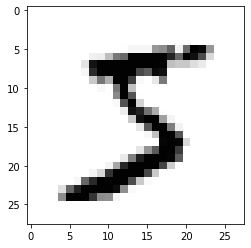

In [16]:
import numpy as np
import scipy.special
import matplotlib.pyplot as plt
%matplotlib inline
all_values = data_list[0].split(',')
image_array = np.asfarray(all_values[1:]).reshape((28, 28))
plt.imshow(image_array, cmap='Greys', interpolation='None')

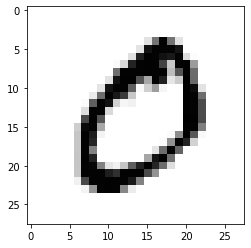

In [17]:
# '0'의 레이블을 가지는 레코드인 data_list[1] 확인
all_values = data_list[1].split(',')
image_array = np.asfarray(all_values[1:]).reshape((28, 28))
plt.imshow(image_array, cmap='Greys', interpolation='None')

In [18]:
scaled_input = (np.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
print(scaled_input)

[0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0

In [19]:
# output nodes is 10 (example)
onodes = 10
targets = np.zeros(onodes) + 0.01
targets[int(all_values[0])] = 0.99

In [20]:
print(targets)

[0.99 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01]


In [28]:
# 신경망 클래스의 정의
class neuralNetwork:
  # 신경망 초기화하기
  def __init__(self, inputnodes, hiddennodes, outputnodes, learningrate):
    # 입력, 은닉, 출력 계층의 노드 개수 설정
    self.inodes = inputnodes
    self.hnodes = hiddennodes
    self.onodes = outputnodes

    # 가중치 행렬 wih와 who
    # 배열 내 가중치는 w_i_j로 표기. 노드 i에서 다음 계층의 노드 j로 연결됨을 의미
    # w11 w21
    # w12 w22 등
    self.wih = np.random.normal(0.0, pow(self.hnodes, -0.5), (self.hnodes, self.inodes))
    self.who = np.random.normal(0.0, pow(self.onodes, -0.5), (self.onodes, self.hnodes))

    # 학습률
    self.lr = learningrate

    # 활성화 함수로는 시그모이드 함수를 이용
    self.activation_function = lambda x: scipy.special.expit(x)

    pass

  # 신경망 학습시키기
  def train(self, inputs_list, targets_list):
    # 입력 리스트를 2차원의 행렬로 변환
    inputs = np.array(inputs_list, ndmin=2).T
    targets = np.array(targets_list, ndmin=2).T

    # 은닉 계층으로 들어오는 신호를 계산
    hidden_inputs = np.dot(self.wih, inputs)
    # 은닉 계층에서 나가는 신호를 계산
    hidden_outputs = self.activation_function(hidden_inputs)

    # 최종 출력 계층으로 들어오는 신호를 계산
    final_inputs = np.dot(self.who, hidden_outputs)
    # 최종 출력 계층에서 나가는 신호를 계산
    final_outputs = self.activation_function(final_inputs)

    # 출력 계층의 오차는 (실제 값 - 계산 값)
    output_errors = targets - final_outputs
    # 은닉 계층의 오차는 가중치에 의해 나뉜 출력 계층의 오차들을 재조합해 계산
    hidden_errors = np.dot(self.who.T, output_errors)

    # 은닉 계층과 출력 계층 간의 가중치 업데이트
    self.who += self.lr * np.dot((output_errors * final_outputs * (1.0 - final_outputs)), np.transpose(hidden_outputs))

    # 입력 계층과 은닉 계층 간의 가중치 업데이트
    self.wih += self.lr * np.dot((hidden_errors * hidden_outputs * (1.0 - hidden_outputs)), np.transpose(inputs))

    pass

  # 신경망에 질의하기
  def query(self, inputs_list):
    # 입력 리스트를 2차원 행렬로 변환
    inputs = np.array(inputs_list, ndmin=2).T

    # 은닉 계층으로 들어오는 신호를 계산
    hidden_inputs = np.dot(self.wih, inputs)
    # 은닉 계층에서 나가는 신호를 계산
    hidden_outputs = self.activation_function(hidden_inputs)

    # 최종 출력 계층으로 들어오는 신호를 계산
    final_inputs = np.dot(self.who, hidden_outputs)
    # 최종 출력 계층에서 나가는 신호를 계산
    final_outputs = self.activation_function(final_inputs)

    return final_outputs



In [29]:
# 입력, 은닉, 출력 노드의 수
input_nodes = 784
hidden_nodes = 100
output_nodes = 10

# 학습률은 0.3
learning_rate = 0.3

# 신경망의 인스턴스 생성
n = neuralNetwork(input_nodes, hidden_nodes, output_nodes, learning_rate)

# mnist 학습 데이터인 csv 파일을 리스트로 불러오기(위에서 실행)

# 신경망 학습시키기

In [30]:
# 학습 데이터 모음 내의 모든 레코드 탐색
for record in data_list:
  # 레코드를 쉼표에 의해 분리
  all_values = record.split(',')
  # 입력 값의 범위와 값 조정
  inputs = (np.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
  # 결과 값 생성 (실제 값인 0.99 외에는 모두 0.01)
  targets = np.zeros(output_nodes) + 0.01
  # all_values[0]은 이 레코드에 대한 결과 값
  targets[int(all_values[0])] = 0.99
  n.train(inputs, targets)
  pass
  